# Explorating visualization of ENEM 2016

**ENEM** is the National Exam of High School, the main way of acess the Public University in Brazil. In 2016, there was more than 228 thousand of University vagues, mostly the Federal unis, such like Federal University of Rio de Janeiro, Federal University of Minas Gerais and since ENEM 2016, the University of São Paulo.

ENEM also permitts you to get a scholarship in private unis, by ProUni. Until 2016, ENEM was able to get you a degree for the people who did not graduate in regular time.

Here, we did a exploratory visualization of the microdata of ENEM 2016, with information of all the participants of the test. We managed to only work with **Minas Gerais** data, because we taught it was a state with a lot of similarities with Brazil itself. We only wanted to work with the grade in the Mathematics test, due our untrivial interest in this science.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
Enem = pd.read_pickle('enem_2016_minas.pkl') #Here we use this pickle: 
## https://drive.google.com/open?id=1vTWRTok9ldvtYMmEUNTZYv0JaGbRRNII

FileNotFoundError: [Errno 2] No such file or directory: 'enem_2016_minas.pkl'

In [2]:
list(Enem) #All the data. You can read the dictionary to this tags in 
## https://drive.google.com/file/d/1zYSiqmf_Ov21EMM7-F6WPevVA6fHvtvl/view?usp=sharing

['NU_INSCRICAO',
 'NU_ANO',
 'CO_MUNICIPIO_RESIDENCIA',
 'NO_MUNICIPIO_RESIDENCIA',
 'CO_UF_RESIDENCIA',
 'SG_UF_RESIDENCIA',
 'NU_IDADE',
 'TP_SEXO',
 'TP_ESTADO_CIVIL',
 'TP_COR_RACA',
 'TP_NACIONALIDADE',
 'CO_MUNICIPIO_NASCIMENTO',
 'NO_MUNICIPIO_NASCIMENTO',
 'CO_UF_NASCIMENTO',
 'SG_UF_NASCIMENTO',
 'TP_ST_CONCLUSAO',
 'TP_ANO_CONCLUIU',
 'TP_ESCOLA',
 'TP_ENSINO',
 'IN_TREINEIRO',
 'CO_ESCOLA',
 'CO_MUNICIPIO_ESC',
 'NO_MUNICIPIO_ESC',
 'CO_UF_ESC',
 'SG_UF_ESC',
 'TP_DEPENDENCIA_ADM_ESC',
 'TP_LOCALIZACAO_ESC',
 'TP_SIT_FUNC_ESC',
 'IN_BAIXA_VISAO',
 'IN_CEGUEIRA',
 'IN_SURDEZ',
 'IN_DEFICIENCIA_AUDITIVA',
 'IN_SURDO_CEGUEIRA',
 'IN_DEFICIENCIA_FISICA',
 'IN_DEFICIENCIA_MENTAL',
 'IN_DEFICIT_ATENCAO',
 'IN_DISLEXIA',
 'IN_DISCALCULIA',
 'IN_AUTISMO',
 'IN_VISAO_MONOCULAR',
 'IN_OUTRA_DEF',
 'IN_SABATISTA',
 'IN_GESTANTE',
 'IN_LACTANTE',
 'IN_IDOSO',
 'IN_ESTUDA_CLASSE_HOSPITALAR',
 'IN_SEM_RECURSO',
 'IN_BRAILLE',
 'IN_AMPLIADA_24',
 'IN_AMPLIADA_18',
 'IN_LEDOR',
 'IN_ACESSO'

## Gender analysis
Here we want to see the possible diferences between male and female participants.

In [5]:
Gender = Enem[['NU_NOTA_MT','NU_IDADE','TP_SEXO']].dropna(axis=0, how='any')
Gender

,NU_NOTA_MT,NU_IDADE,TP_SEXO
1254190,991.5,19.0,M
2809767,991.5,26.0,M
4649479,991.5,25.0,F
799655,991.5,17.0,F
1549642,991.5,17.0,M
389924,991.5,17.0,M
8097502,990.5,24.0,M
8021825,990.5,43.0,M
936806,990.5,26.0,M
1930967,985.3,18.0,F


In [8]:
Gender.groupby(['TP_SEXO'])['NU_NOTA_MT'].describe()

,count,mean,std,min,25%,50%,75%,max
TP_SEXO,,,,,,,,
F,376193.0,490.981906,102.592931,0.0,413.6,470.2,550.4,991.5
M,266301.0,536.515841,118.334317,0.0,442.9,520.8,616.2,991.5


# Age analysis
Here we want to analyse the average grade in all ages. Again, people of all ages take ENEM to join University or graduate in High School. We ploted all ages but after 60 there was a lot of noise. 

## Average by age

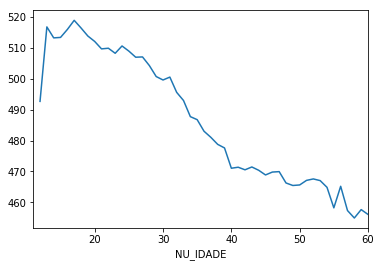

In [10]:
Age = Enem[Enem['NU_IDADE']<=60].groupby(['NU_IDADE'])['NU_NOTA_MT'].mean()
Age.plot()
plt.show()

## Certification of Conclusion by age